# Classification

For a classification task, is comum to start by using a linear regression model, like $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. However, when we deal with binary output variables (0 or 1), as is often the case in classification, we need a way to ensure that our predictions are in the range of 0 to 1. This is where we can use a logistic function to map all input values to values between 0 and 1, like the the sigmoid function.

The formula for a sigmoid function is as follows -  

$$
g(z) = \frac{1}{1+e^{-z}}\tag{1}
$$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- In the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`), or for a single number.

## Librarys

In [4]:
import numpy as np
import matplotlib.pyplot as plt


## Data for example

This is a data example of an array of evenly spaced values between -10 and 10

In [5]:
z_tmp = np.arange(-10,11)

This is a categorical data example of tumor classification.

In [6]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) 
y_train = np.array([0, 0, 0, 1, 1, 1])    

w_in = np.zeros((1))
b_in = 0

## Sigmoid or Logistic Function

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """
    
    return 1/(1 + np.exp(-z))

In [8]:
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


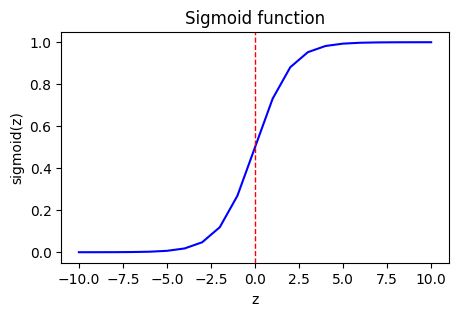

In [9]:
# Plot z vs sigmoid(z)
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")
ax.axvline(x=0, linewidth=1, color='r', linestyle='--')

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
plt.show()

As you can see, the sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.


## Logistic Loss Function

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. Because $y^{(i)}$ can have only two values, 0 and 1, the equation gets simplified in two pieces: when $ y^{(i)} = 0$, the left-hand term is eliminated and when $ y^{(i)} = 1$, the right-hand term is eliminated.


OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. This will be the topic of the next lab. For now, let's take a look at the cost vs parameters curve for the simple example we considered above:

In [10]:
def calculate_logistic_regression_output(w, b, x):
    f_wb = np.dot(x, w) + b
    return sigmoid(f_wb)


def compute_logistic_loss(w, b, x, y):
    m = len(x)
    y_predicted = calculate_logistic_regression_output(w, b, x)
    
    loss = np.sum(-np.dot(y, np.log(y_predicted)) - np.dot(1 - y, np.log(1 - y_predicted)))
    
    return 1/m * loss

In [11]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_logistic_loss(w_tmp, b_tmp, x_train, y_train))

0.3668667864055174


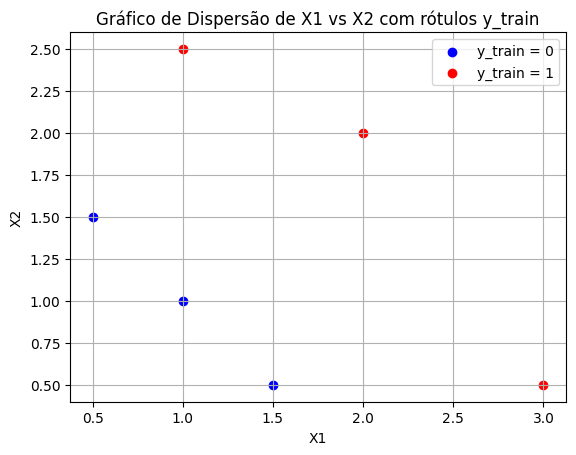

In [12]:
# Dividindo os pontos de acordo com os rótulos
x_class_0 = x_train[y_train == 0]
x_class_1 = x_train[y_train == 1]

# Plot
plt.scatter(x_class_0[:, 0], x_class_0[:, 1], color='blue', label='y_train = 0')
plt.scatter(x_class_1[:, 0], x_class_1[:, 1], color='red', label='y_train = 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfico de Dispersão de X1 vs X2 com rótulos y_train')
plt.legend()
plt.grid(True)
plt.show()

## Logistic Gradient Descent

We already defined gradient descent on the other notebook about regression. We will be using him to find the best values for the parameters to our model. The only diferrence from the previous algorithm is the fact that $J(w,b) = \frac{1}{1+e^{-z}}$


$$
\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial b} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}
$$

The gradient are the partial derivatives of the cost function $J(w, b)$ with respect to $w$ and $b$ separetly, defined as:

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [13]:
def compute_gradient_logistic(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model

    Returns:
        dJ_dw (ndarray): Partial derivative of cost with respect to w, shape (n,)
        dJ_db (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_logistic_regression_output(w, b, x)
    dJ_dw = np.dot((f_wb - y), x)
    dJ_db = np.sum(f_wb - y)
    
    dJ_dw = np.multiply(dJ_dw, 1/m)
    dJ_db *= (1 / m)
    
    
    return dJ_dw, dJ_db


def logistic_regression(x, y, lr=0.00000001, thold=1e-6, iterations=1000):
    """
    Performs batch gradient descent
    
    Args:
        X (ndarray (m,n)    : Data, m examples with n features
        y (ndarray (m,))    : Target values
        lr (float)          : Learning rate
        thold (float)       : Threshold to stop iterations
        num_iters (scalar)  : Number of iterations to run gradient descent
    
    Returns:
        w (ndarray (n,))    : Updated values of parameters
        b (scalar)          : Updated value of parameter 
    """
    w = [np.random.rand() for _ in x[0]]
    b = np.random.rand()

    w_history = []
    b_history = []
    costs_history = []  # current cost = costs_history[-1] / last cost = costs_history[-2]
    
    for i in range(int(iterations)):
        dJ_dw, dJ_db = compute_gradient_logistic(x, y, w, b)
        # Updating parameters
        w = w - lr * dJ_dw
        b = b - lr * dJ_db
        
        costs_history.append(compute_logistic_loss(w, b, x, y))
        w_history.append(w)
        b_history.append(b)

        # Printing the parameters for every 100th iteration
        if i % 5000 == 0:
            print(f"Iteration {i}: Cost {costs_history[-1]}, Weight {w}, Bias {b}")
            
            
        if len(costs_history) >= 2 and abs(costs_history[-2] - costs_history[-1]) <= thold:
            reason_break = "thold"
            break
    
    print(f"Model converged using  after {i} iterations with: \nCost: {costs_history[-1]} \nWeight: {w} \nBias: {b}")
    
    return w, b, w_history, b_history, costs_history

In [14]:
w_out, b_out, _, _, _ = logistic_regression(x_train, y_train, lr = 0.1, iterations=1000000)

Iteration 0: Cost 0.7516480015713476, Weight [0.471 0.103], Bias 0.4021913669799498
Iteration 5000: Cost 0.03445280686284776, Weight [4.352 4.146], Bias -11.649275810941397
Iteration 10000: Cost 0.01714464818972752, Weight [5.279 5.076], Bias -14.216650000310333
Model converged using  after 13129 iterations with: 
Cost: 0.013031366120090192 
Weight: [5.643 5.441] 
Bias: -15.223213620251085


In [15]:
def plt_prob(ax, w, b):
    x0_vals = np.linspace(0, 4, 100)
    x1_vals = np.linspace(0, 3.5, 100)
    xx0, xx1 = np.meshgrid(x0_vals, x1_vals)
    zz = sigmoid(w[0] * xx0 + w[1] * xx1 + b)
    ax.contourf(xx0, xx1, zz, cmap='RdBu', alpha=0.5)

def plot_data(X, y, ax):
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    ax.legend()

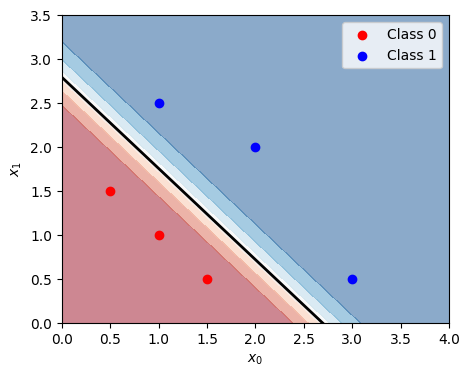

In [16]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(x_train,y_train,ax)

# Plot the decision boundary
x0 = np.linspace(0, 4, 100)
x1 = -(b_out + w_out[0] * x0) / w_out[1]
ax.plot(x0, x1, c='black', lw=2)
plt.show()

# Regularizesd Logistic Regression 

## Cost Function

For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 

Compare this to the cost function without regularization (which you implemented in  a previous lab):

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] \tag{5} $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:orange">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice. 

In [19]:
def compute_logistic_cost_reg(w, b, x, y, lambda_):
    m = len(x)
    reg_cost =  lambda_/(2*m) * np.sum(w**2)
    total_cost = compute_logistic_loss(w, b, x, y) + reg_cost
    
    return total_cost

In [21]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_logistic_cost_reg(w_tmp, b_tmp, X_tmp, y_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


## Gradient descent with regularization on classification

The basic algorithm for running gradient descent does not change with regularization. What changes is the derivative for $f_{\mathbf{w}b}$, with the added regularization term $ \frac{\lambda}{m} w_j $

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{6}
\end{align*}$$

For a **logistic** regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

In [45]:
def compute_gradient_logistic_reg(x, y, w, b, lambda_):
    """
    Computes the gradient using formula
    
    Args:
        x (ndarray): Shape (m, n) variable, where m is the number of samples and n is the number of features
        y (ndarray): Shape (m,) target
        w (ndarray): Shape (n,) parameter of the model
        b (scalar): Parameter of the model

    Returns:
        dJ_dw (ndarray): Partial derivative of cost with respect to w, shape (n,)
        dJ_db (scalar): Partial derivative of cost with respect to b
    """
    
    m = len(x)
    f_wb = calculate_logistic_regression_output(w, b, x)
    dJ_dw = np.dot((f_wb - y), x)
    dJ_db = np.sum(f_wb - y)
    
    dJ_dw = dJ_dw * (1/m) + (lambda_/m) * w
    dJ_db *= (1 / m)
    
    
    return dJ_dw, dJ_db

In [46]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: [0.174 0.32  0.108]
Regularized dj_dw:
 0.34179899497279104
